### Crater Histograms

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
DM = np.loadtxt('LCraters.dat', usecols=(0,), unpack=True)
DV = np.loadtxt('VenusCratersD.dat', usecols=(1,), unpack=True)
#DNA = np.loadtxt('NorthAmericaD.dat', unpack=True)

DW = np.loadtxt('World.csv', delimiter= ",", usecols=(6,), unpack=True)
DNA = np.loadtxt('NorthAmerica.csv', delimiter= ",", usecols=(6,), unpack=True)
DAu = np.loadtxt('Australia.csv', delimiter= ",", usecols=(6,), unpack=True)

In [3]:
#print DW

In [4]:
def log_10_product(x, pos):
    if (x < 1.0):
      return '%4.2f' % (x)
    else:
      return '%i' % (x)

In [5]:
tfont = {
    'family' : 'DejaVu Serif',
    'weight' : 'bold',
    'size' : 14}

plt.rc('font', **tfont)
plt.rc("axes", linewidth=3.0)
plt.rc('axes', grid=False)

formatter = plt.FuncFormatter(log_10_product)

In [6]:
# Make sqrt(2) bins

n = 17
a,b = 1,1

Bins = np.zeros(n)

for i in range(n):
    a,b = b,b*np.sqrt(2)
    
    Bins[i] = a
    
Width = (Bins[1:] - Bins[:-1])

In [7]:
#print Bins, Width

In [8]:
# HARTMANN’S PRODUCTION FUNCTION
# 1.41 km < DL < 64 km
# http://adsabs.harvard.edu/abs/2001SSRv...96...55N

#log N = −2.616 − 3.82 log DL , DL < 1.41 km
#log N = −2.920 − 1.80 log DL , 1.41 km < DL < 64 km
#log N = −2.198 − 2.20 log DL , DL > 64 km

N = -2.920 - 1.80 * np.log(Bins[:-1])

FakeMoon = exp(N) * 1.8e3

#print FakeMoon
#print len(FakeMoon)

In [9]:
VHist,BinEdge = np.histogram(DV, bins=Bins)

# Venus Surface Area = 460.2 Million sq km

VHistNorm = VHist / 460.2

#print VHist
#print VHistNorm

In [10]:
NAHist,BinEdge = np.histogram(DNA, bins=Bins)

# North America Surface Area = 24.71 Million sq km

NAHistNorm = NAHist / 24.71

#print NAHist
#print NAHistNorm

In [11]:
WHist,BinEdge = np.histogram(DW, bins=Bins)

# Surface Areas (million sq km)

# North America = 24.71
# South America = 17.84 
# Africa = 30.22
# Australia = 7.692
# Europe = 10.18
# AsiaRussia = 44.58

# World = 135.2

WHistNorm = WHist / 135.2

In [12]:
AuHist,BinEdge = np.histogram(DAu, bins=Bins)
AuHistNorm = AuHist / 7.692

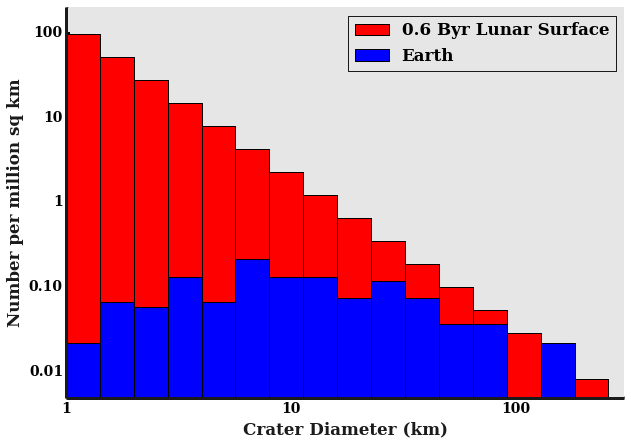

In [21]:
X = np.linspace(0,500,500)
Y = X**(-2) * 100

fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,7)

#ax.grid(b=True, which='major')

ax.set_xscale('log')
ax.set_yscale('log', nonposy='clip')
ax.set_ylim(0.005,200)
ax.set_xlim(1,300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)

ax.set_xlabel('Crater Diameter (km)')
ax.set_ylabel('Number per million sq km')


ax.bar(Bins[:-1], FakeMoon, width=Width, color='r', label='0.6 Byr Lunar Surface');
#ax.bar(Bins[:-1], VHistNorm, width=Width, color='g', alpha=1.0, label='Venus');
ax.bar(Bins[:-1], WHistNorm, width=Width, color='b', alpha=1.0, label='Earth');

#ax.bar(Bins[:-1], NAHistNorm, width=Width, color='b', alpha=1.0, label='North America');
#ax.bar(Bins[:-1], AuHistNorm, width=Width, color='c', alpha=1.0, label='Australia');

ax.legend(loc=0);

#ax.bar(Bins[:-1], NAHistNorm, width=Width, color='b', alpha=0.5);

In [14]:
print DV[np.where(DV>=10)].size / 460.2
print DW[np.where(DW>=10)].size / 135.2
print DNA[np.where(DNA>=10)].size / 24.71
print DAu[np.where(DAu>=10)].size / 7.692

# Venus 646 Craters >= 10 km over 460.2 million sq km
# N(10) = 1.4

# North America 29 craters >= 10 km over 24.71 milliom sq km
# N(10) = 1.2

1.40373750543
0.569526627219
1.17361392149
1.6900676027


In [22]:
fig.savefig('EarthCraters.png', dpi=300, bbox_inches='tight',pad_inches=0.05)